In [19]:
import os, json
from glob import glob
from tqdm import tqdm
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('default')

In [165]:
def visualize_map(img, main_label, vcf_label):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    img = img.permute(1, 2, 0)
    axes[0].imshow(img)
    axes[1].imshow(img)
    main_label = np.array(main_label, dtype=np.uint8)
    vcf_label = np.array(vcf_label, dtype=np.uint8)
    cmap = cm.get_cmap('tab10')
    main_colored = cmap(main_label)
    vcf_colored = cmap(vcf_label)
    main_colored[..., 3] = (main_label != 0).astype(float)
    vcf_colored[..., 3] = (vcf_label != 0).astype(float)
    axes[0].imshow(main_colored)
    axes[1].imshow(vcf_colored)

In [173]:
no_vcf_path = list()
for path in tqdm(sorted(glob(os.path.join('/Users/spinai_dev/Desktop/Spinai/Projects/VCF-PIDNet/data/vcf', '*.json')), reverse=False)):
    with open(path) as f:
        T = json.load(f)
    detected_vcf = list()
    for obj in T['shapes']:
        if obj['label'] == 'VCF':
            detected_vcf.append(obj)
    if len(detected_vcf) == 0:
        assert (not 'VCF' in [a['label'] for a in T['shapes']])
        # print(f"No VCF in {path}")
        no_vcf_path.append(os.path.basename(path))
    for vcf in detected_vcf:
        vcf_cnt = 0
        
        for obj in  T['shapes']:
            if obj['label'] == vcf['label']:
                continue
            vcf_array = np.array(vcf['points'])
            obj_array = np.array(obj['points'])
                
            if vcf_array.shape[0] == obj_array.shape[0]:
                dif_list = vcf_array - obj_array
                if (dif_list[0] == dif_list).all():
                    vcf_cnt += 1
                    continue
        try:
            assert vcf_cnt == 1
        except:
            print(f"{vcf_cnt} in {path}: VCF_IN: {'VCF' in [a['label'] for a in T['shapes']]}")
            print([a['label'] for a in T['shapes']])
        # all(np.array(vcf['points']).reshape(-1) == np.array(obj['points']).reshape(-1))

100%|██████████| 443/443 [00:00<00:00, 2820.74it/s]


AttributeError: 'numpy.ndarray' object has no attribute 'permute'

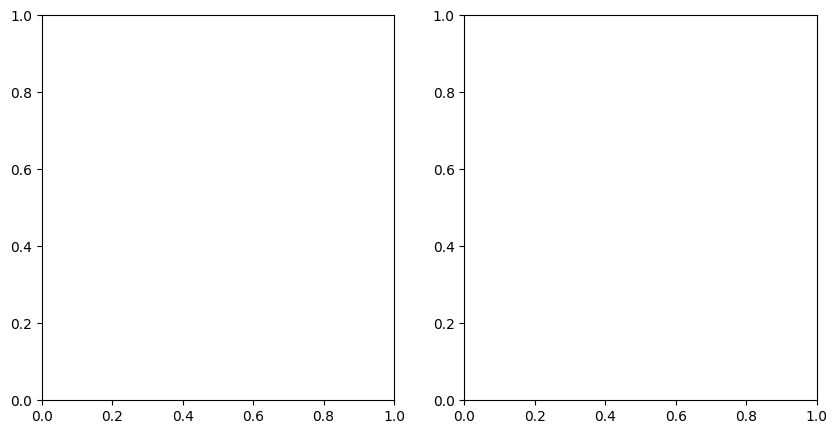

In [170]:
data_root_path = '/Users/spinai_dev/Dropbox/006_researchdata/0005_Lat_Lxray_label'
save_root_path = '/Users/spinai_dev/Desktop/Spinai/Projects/VCF-PIDNet/data'

idx = 0
vcf_mode = 'Lat_Lxray_label' # vcf or Lat_Lxray_label
data_path = glob(os.path.join(data_root_path, vcf_mode, '*.jpg'))[idx]

img = cv2.imread(data_path)
normal_label = np.load(os.path.join(save_root_path, 'level_mask', os.path.basename(data_path).replace('.jpg', '.npy')))
vcf_label = np.load(os.path.join(save_root_path, 'vcf_mask', os.path.basename(data_path).replace('.jpg', '.npy')))
visualize_map(img, normal_label, vcf_label)

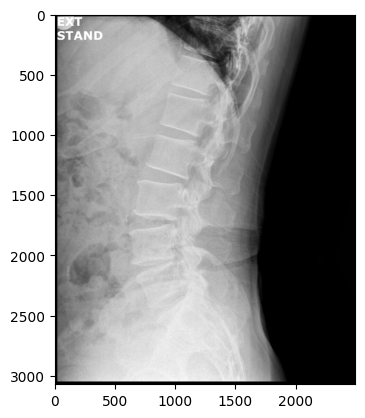

In [171]:
plt.imshow(img)

In [44]:
def clahe(img, adaptive_hist_range=False):
    """
    input 1 numpy shape image (H x W x (D) x C)
    """
    temp = np.zeros_like(img)
    for idx in range(temp.shape[-1]):
        temp[...,idx] = mclahe.mclahe(img[...,idx], n_bins=128, clip_limit=0.04, adaptive_hist_range=adaptive_hist_range)
    return temp

In [45]:
img = cv2.imread(data_path)
print(img.shape)
if len(img.shape) == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
print(img.shape)

(3072, 2040, 3)
(3072, 2040, 3)


In [46]:
# outlier clip
x_cutoff_max = int(np.percentile(img, 99))
image_clip = img.clip(0, x_cutoff_max)
print(image_clip.shape)
print(image_clip.mean(), image_clip.std())

(3072, 2040, 3)
108.48969566993465 81.94846312975208


In [47]:
# normalization, resize
sample = vcf_transforms(image=image_clip)
image_transform = sample['image']
print(image_transform.shape)
print(image_transform.mean(), image_transform.std())

(1024, 680, 3)
108.53434053308824 81.91121486316841


In [48]:
# clahe
print(image_transform.mean(), image_transform.std())
print(image_transform.shape)
image_clahe = clahe(image_transform.astype(np.float32),True)
print(image_clahe.mean(), image_clahe.std())
print(image_clahe.shape)
image_clahe = np.moveaxis(image_clahe,-1,0)
print(image_clahe.mean(), image_clahe.std())
print(image_clahe.shape)
image_clahe = torch.tensor(image_clahe)
print(image_clahe.mean(), image_clahe.std())
print(image_clahe.shape)

108.53434053308824 81.91121486316841
(1024, 680, 3)
0.39230737 0.29521567
(1024, 680, 3)
0.39230737 0.29521567
(3, 1024, 680)
tensor(0.3923) tensor(0.2952)
torch.Size([3, 1024, 680])


In [51]:
normal_label = np.load(os.path.join(save_root_path, 'level_mask', os.path.basename(data_path).replace('.jpg', '.npy')))
vcf_label = np.load(os.path.join(save_root_path, 'vcf_mask', os.path.basename(data_path).replace('.jpg', '.npy')))
argmax_normal_label = np.load(os.path.join(save_root_path, 'argmax_level_mask', os.path.basename(data_path).replace('.jpg', '.npy')))
argmax_vcf_label = np.load(os.path.join(save_root_path, 'argmax_vcf_mask', os.path.basename(data_path).replace('.jpg', '.npy')))

In [ ]:
data_root_path = '/Users/spinai_dev/Dropbox/006_researchdata/0005_Lat_Lxray_label'
vcf_mode = 'vcf'

'/Users/spinai_dev/Desktop/Spinai/Projects/VCF-PIDNet'

In [282]:
from utils.dataset import Custom_Dataset
%load_ext autoreload
%autoreload 2
cd = Custom_Dataset(data_path=glob(os.path.join(data_root_path, vcf_mode, '*.jpg')), label_direc='/Users/spinai_dev/Desktop/Spinai/Projects/VCF-PIDNet/data', size=(1024, 1024))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [284]:
data, (level_label, vcf_label), edge = cd[0]
data.shape, (level_label.shape, vcf_label.shape), edge.shape

(torch.Size([3, 1024, 1024]),
 (torch.Size([1024, 1024]), torch.Size([1024, 1024])),
 (1024, 1024))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/var/folders/4d/dcf4k8vj3870rtxt0gtfnz9h0000gn/T/ipykernel_3380/2548795375.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


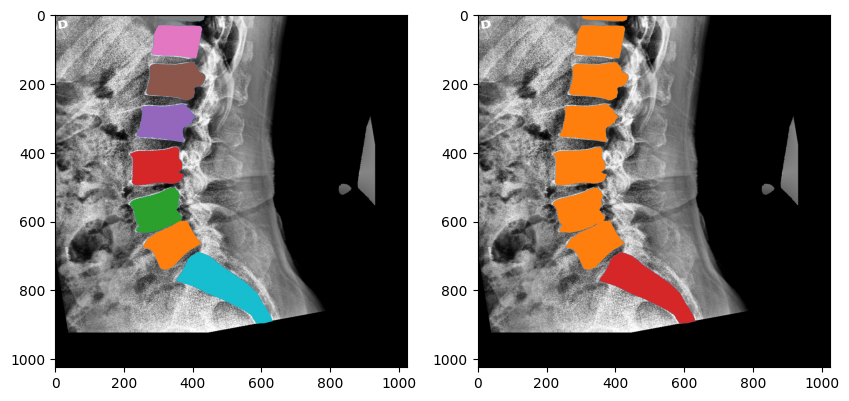

In [217]:
data, (level_label, vcf_label), edge = cd[0]
visualize_map(data, level_label, vcf_label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/var/folders/4d/dcf4k8vj3870rtxt0gtfnz9h0000gn/T/ipykernel_3380/2548795375.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


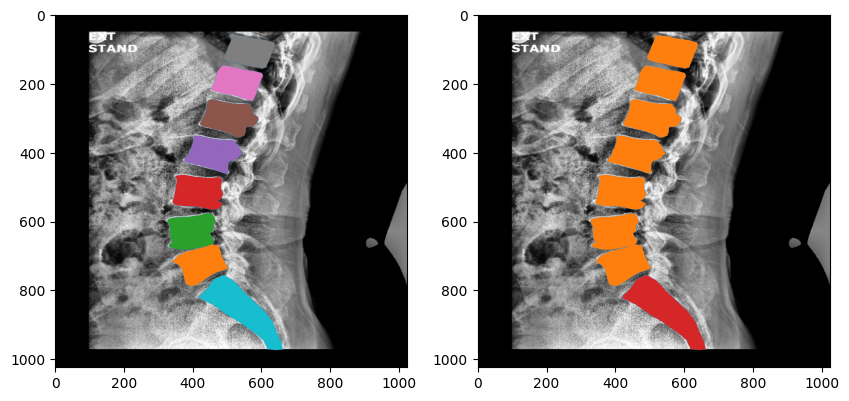

In [218]:
data, (level_label, vcf_label), edge = cd[0]
visualize_map(data, level_label, vcf_label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/var/folders/4d/dcf4k8vj3870rtxt0gtfnz9h0000gn/T/ipykernel_3380/2548795375.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


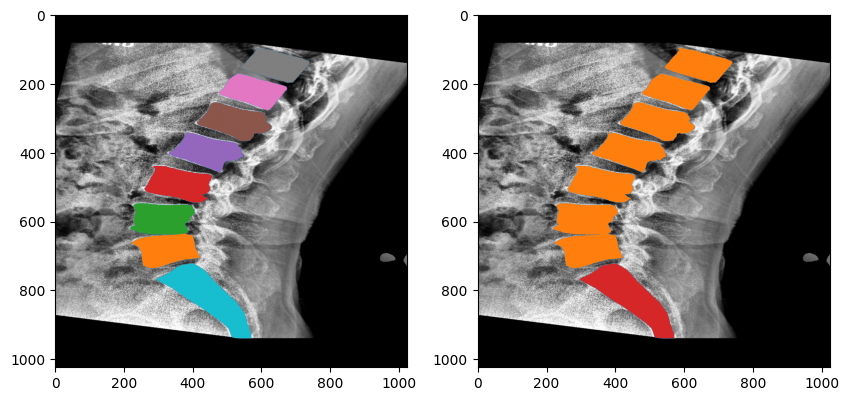

In [219]:
data, (level_label, vcf_label), edge = cd[0]
visualize_map(data, level_label, vcf_label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/var/folders/4d/dcf4k8vj3870rtxt0gtfnz9h0000gn/T/ipykernel_3380/2548795375.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


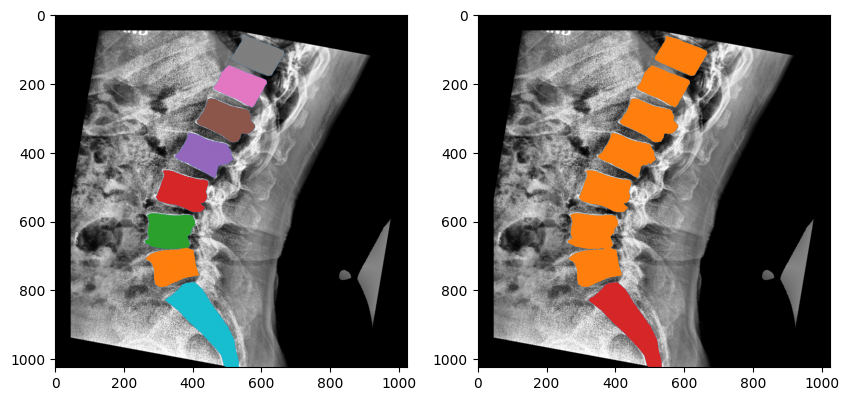

In [275]:
data, (level_label, vcf_label), edge = cd[0]
visualize_map(data, level_label, vcf_label)

In [28]:
data_root_path = '/Users/spinai_dev/Dropbox/006_researchdata/0005_Lat_Lxray_label'
Label_Class = {
    'background':0,
    'L5': 1, 'L4': 2, 'L3': 3, 'L2': 4, 'L1': 5, 'T12': 6,
    'T11': 7, 'T10': 8, 'T9': 9, 'latSacrum': 10
}

vcf_Label_Class = {
    'background':0,
    'Normal': 1, 'VCF': 2, 'latSacrum':3
}
vcf_normal_class = ['L5', 'L4', 'L3', 'L2', 'L1', 'T12', 'T11', 'T10', 'T9']

In [ ]:
import os
from glob import glob
import shutil
from sklearn.model_selection import train_test_split
vcf_data_paths = glob(os.path.join(data_root_path, 'vcf', '*.jpg'))
normal_data_paths = glob(os.path.join(data_root_path, 'Lat_Lxray_label', '*.jpg'))

valid_test_ratio = 0.2
test_ratio = 0.5
random_state = 67

vcf_train_path, vcf_valid_test_path = train_test_split(vcf_data_paths, test_size=valid_test_ratio, random_state=random_state, shuffle=True)
vcf_valid_path, vcf_test_path = train_test_split(vcf_valid_test_path, test_size=test_ratio, random_state=random_state, shuffle=True)
normal_train_path, normal_valid_test_path = train_test_split(normal_data_paths, test_size=valid_test_ratio, random_state=random_state, shuffle=True)
normal_valid_path, normal_test_path = train_test_split(normal_valid_test_path, test_size=test_ratio, random_state=random_state, shuffle=True)

orig_data = {
    'vcf':{
        'train':vcf_train_path,
        'valid':vcf_valid_path,
        'test':vcf_test_path,
    },
    'Lat_Lxray_label':{
        'train':normal_train_path,
        'valid':normal_valid_path,
        'test':normal_test_path,
    }
}
for orig_type, img_dataset in orig_data.items():
    for training_mode, img_paths in img_dataset.items():
        for img_src_path in img_paths:
            json_src_path = img_src_path.replace('.jpg', '.json')
            dst_path = 
            convert_colored_mask(path, save_path, os.path.basename(path).split('.')[0], vcf_Label_Class, vcf_normal_class)
            convert_colored_mask(path, save_path, os.path.basename(path).split('.')[0], Label_Class)

2320
1509 189 189


In [27]:
normal_train_path[0]

'/Users/spinai_dev/Dropbox/006_researchdata/0005_Lat_Lxray_label/Lat_Lxray_label/e00178361-230213.jpg'

In [22]:
len(a), len(b)

(389, 44)